# MutClust Output analysis and occurrence matrix creation - Total patients - Only Hugo - p-value < 0.05

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/MutClust_output_definitivo")

REMEMBER: 
- from MutSig2CV I selected the genes with p-value < 0.05 
- in input to MutClust I just gave the Hugo symbols without the variant classifications

### Genes significantly mutated only both in TN and non TN dataset (pval < 0.05)

In [3]:
# I run MutClust on the TOTAL DATASET intersected with the significant genes from MutSig2CV
df_mutclust_100_p005_TNandNONTN_onlyHugo = pd.read_csv('Output_onlyHugo_TNandNONTN_p005_definitivo.txt', delimiter='\t', engine='python')
df_mutclust_100_p005_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,12.390603,0.000000
1,TP53,191,199,0.079947,Y,65,11.235052,0.000000
2,TP53,236,258,0.077052,Y,94,10.677970,0.000000
3,TP53,173,177,0.061644,Y,47,7.713317,0.000000
4,TP53,211,218,0.030277,Y,32,1.677717,0.089109
...,...,...,...,...,...,...,...,...
8134,PIAS2,391,391,0.089299,N,1,-1.885482,0.990099
8135,PIAS2,427,427,0.089299,N,1,-1.885482,0.990099
8136,PIAS2,481,481,0.089299,N,1,-1.885482,0.990099
8137,PIAS2,538,538,0.089299,N,1,-1.885482,0.990099


In [4]:
# sort the dataframe by ascending order of Pvalue (from the most significant mutation to the least significant)
df_mutclust_100_p005_TNandNONTN_onlyHugo = df_mutclust_100_p005_TNandNONTN_onlyHugo.sort_values('Pvalue')
df_mutclust_100_p005_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,12.390603,0.000000
1179,GATA3,406,408,0.150000,Y,29,17.358447,0.000000
84,MAML3,503,503,0.388010,Y,7,7.172536,0.000000
2288,AKT1,17,17,0.801838,N,41,46.515847,0.000000
6053,MYL10,26,26,0.631939,Y,7,6.857645,0.000000
...,...,...,...,...,...,...,...,...
2819,CDKN2A,69,69,0.076923,N,1,-2.231282,0.990099
2818,CDKN2A,50,50,0.076923,N,1,-2.231282,0.990099
2817,CDKN2A,36,36,0.076923,N,1,-2.231282,0.990099
2781,CREBBP,1593,1593,0.038052,N,1,-2.337278,0.990099


**Relevant_cluster** : creates a dictionary containing values from 0.01 to 1 (with an interval of 0.01), in which each value is associated to the number of genes with p-value lower than the value itself.

In [5]:
# define a function that gives in output the number of relevant clusters at different p-values
def Relevant_cluster (df_mutclust):
    n_relevant_clusters = {}   
    for i in np.arange(0.01, 1, 0.01):
        n_relevant_clusters[i]=len(df_mutclust[df_mutclust.Pvalue<i]) 
    return (n_relevant_clusters)

In [6]:
n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo = Relevant_cluster(df_mutclust_100_p005_TNandNONTN_onlyHugo)
n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo

{0.01: 36,
 0.02: 37,
 0.03: 47,
 0.04: 51,
 0.05: 54,
 0.060000000000000005: 57,
 0.06999999999999999: 60,
 0.08: 63,
 0.09: 66,
 0.09999999999999999: 69,
 0.11: 69,
 0.12: 74,
 0.13: 77,
 0.14: 85,
 0.15000000000000002: 88,
 0.16: 93,
 0.17: 95,
 0.18000000000000002: 98,
 0.19: 103,
 0.2: 107,
 0.21000000000000002: 113,
 0.22: 113,
 0.23: 116,
 0.24000000000000002: 118,
 0.25: 119,
 0.26: 120,
 0.27: 124,
 0.28: 128,
 0.29000000000000004: 132,
 0.3: 135,
 0.31: 137,
 0.32: 140,
 0.33: 143,
 0.34: 145,
 0.35000000000000003: 149,
 0.36000000000000004: 151,
 0.37: 155,
 0.38: 159,
 0.39: 161,
 0.4: 164,
 0.41000000000000003: 168,
 0.42000000000000004: 168,
 0.43: 172,
 0.44: 172,
 0.45: 174,
 0.46: 175,
 0.47000000000000003: 176,
 0.48000000000000004: 179,
 0.49: 184,
 0.5: 184,
 0.51: 186,
 0.52: 187,
 0.53: 189,
 0.54: 194,
 0.55: 197,
 0.56: 199,
 0.5700000000000001: 203,
 0.5800000000000001: 207,
 0.59: 213,
 0.6: 221,
 0.61: 227,
 0.62: 232,
 0.63: 239,
 0.64: 242,
 0.65: 249,
 0.6

In [7]:
# count how many clusters have p-value = 0 
len(df_mutclust_100_p005_TNandNONTN_onlyHugo.loc[df_mutclust_100_p005_TNandNONTN_onlyHugo['Pvalue'] == 0.000000])

32

In [8]:
# convert the dictionary into a Dataframe
df_n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo = pd.DataFrame.from_dict(n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo, orient='index')
df_n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo.rename(columns={0: "Significant clusters"}, inplace=True)
df_n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo.reset_index(level=0, inplace=True)
df_n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo.rename(columns={"index": "P-value"}, inplace=True)
df_n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo

,P-value,Significant clusters
0,0.01,36
1,0.02,37
2,0.03,47
3,0.04,51
4,0.05,54
...,...,...
94,0.95,654
95,0.96,698
96,0.97,726
97,0.98,767


### Plot the number of significant clusters as the p-value varies

Define a function to plot the number of significant clusters as the p-value varies.

In [9]:
def Grafico_Clusters_significativi_one_dataset(df_n_rel_clusters_mutclust, caso):
    casistica_titolo = 'Significant hotspots as the p-value varies - XXX'
    casistica_titolo = casistica_titolo.replace('XXX',caso)
    casistica_legenda = 'Significant hotspots determined by the XXX'
    casistica_legenda = casistica_legenda.replace('XXX', caso)
    
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust.copy()
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust_copy.set_index('P-value')
    
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.plot(df_n_rel_clusters_mutclust_copy, label = casistica_legenda, color = 'red')
    plt.xlabel('P-value', fontsize=13)
    plt.ylabel('Number of significant hotspots', fontsize=13)
    plt.legend(loc='lower left', bbox_to_anchor=(0.0, -0.2), fontsize='large')
    plt.title(casistica_titolo,fontsize= 18)

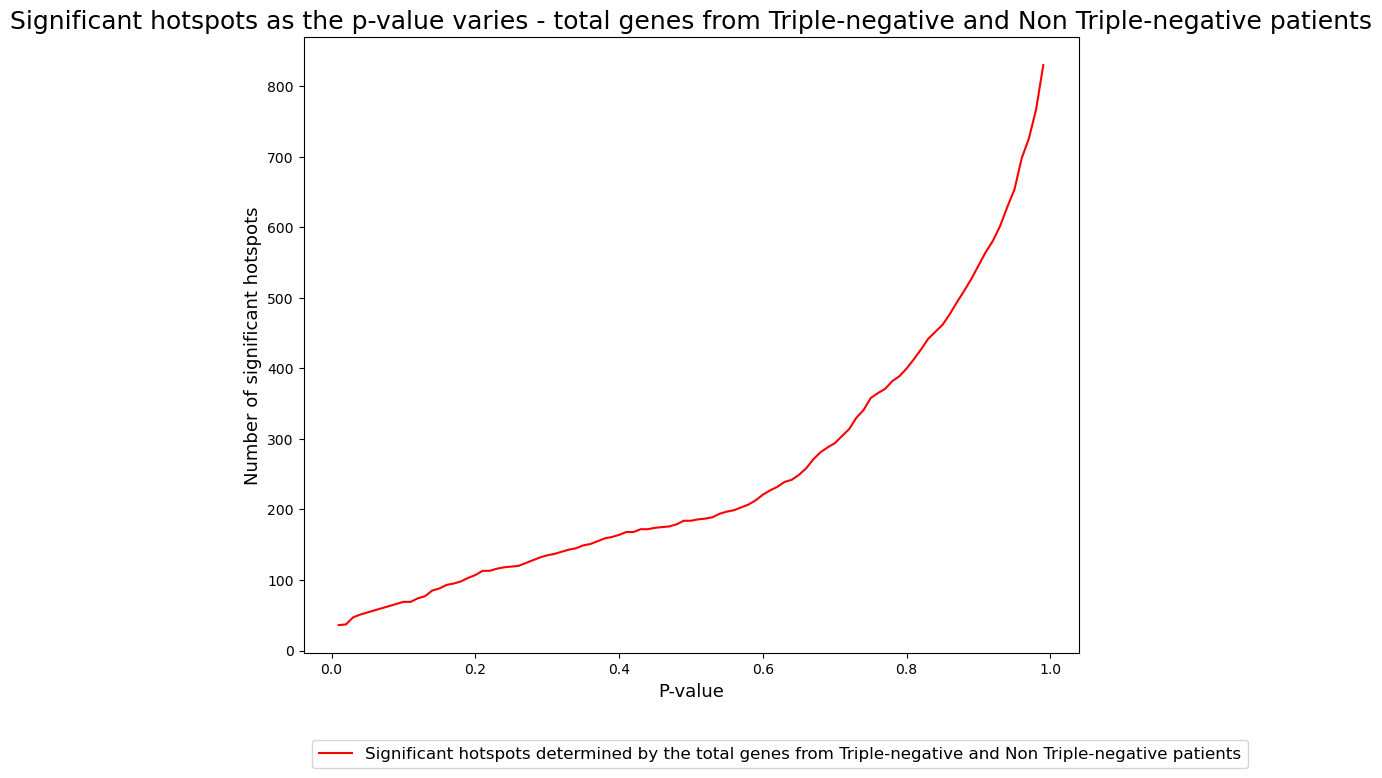

In [10]:
Grafico_Clusters_significativi_one_dataset(df_n_relevant_clusters_mutclust_100_p005_TNandNONTN_onlyHugo, 'total genes from Triple-negative and Non Triple-negative patients')

### Look at the clusters with a p-value < 0.05

**Freq_cluster**: this function takes as input the output of MutClust containing the clusters associated to a p-value and a specific p-value. The output is a subset of the original dataframe containing only the clusters with a p-value < seleceted p-value.

In [11]:
def Freq_cluster (df, val):
    freq_clusters = df[(df.Pvalue<val)]
    return (freq_clusters)

In [12]:
# Genes significantly mutated both in the Triple-Negative dataset and in the non Triple-Negative dataset (pval < 0.05)
freq_cluster_100_TNandNONTN_onlyHugo = Freq_cluster(df_mutclust_100_p005_TNandNONTN_onlyHugo, 0.05)
freq_cluster_100_TNandNONTN_onlyHugo = freq_cluster_100_TNandNONTN_onlyHugo.reset_index(drop=True)
freq_cluster_100_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,12.390603,0.000000
1,GATA3,406,408,0.150000,Y,29,17.358447,0.000000
2,MAML3,503,503,0.388010,Y,7,7.172536,0.000000
3,AKT1,17,17,0.801838,N,41,46.515847,0.000000
4,MYL10,26,26,0.631939,Y,7,6.857645,0.000000
5,PIK3R1,566,578,0.327791,Y,12,10.541688,0.000000
6,NUP93,14,15,0.597558,Y,6,7.387957,0.000000
7,ZKSCAN1,270,270,0.569652,Y,16,15.939144,0.000000
8,CTCF,283,288,0.188882,Y,7,4.380968,0.000000
9,GATA3,308,335,0.248216,Y,64,31.756190,0.000000


In [13]:
len(freq_cluster_100_TNandNONTN_onlyHugo)

54

There are 54 significant clusters (p-value < 0.05) considering all the relevant genes in BOTH the Triple-negative dataset and the NON Triple-Negative dataset.

# Occurrence Matrix Creation

In [14]:
# load the mutation dataset resulting from the intersection between the significant TN and NON TN genes from MutSig and the total ductal dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/MutClust_input_DEFINITIVO")
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo = pd.read_csv('data_mutation_SINIFICANTgenes_ONLYhugo_bothTNandNONTN_P005_definitivo.txt', sep=None, engine='python')
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,...,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end,Protein_length
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,TP53,17,7574003.0,7574003.0,Nonsense_Mutation,SNP,G,G,...,ENST00000269305.4:c.1024C>T,p.R342*,ENST00000269305,25760,NaN,TP53_Nonsense_Mutation,1.0,342.0,342.0,393
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PIK3CA,3,178952150.0,178952151.0,Frame_Shift_Ins,INS,-,-,...,ENST00000263967.3:c.3205_3206insTTTT,p.*1069Ffs*5,ENST00000263967,91980,NaN,PIK3CA_Frame_Shift_Ins,2.0,1069.0,1069.0,1068
2,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,...,ENST00000269305.4:c.821T>G,p.V274G,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,274.0,274.0,393
3,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MAML3,4,140811082.0,140811083.0,In_Frame_Ins,INS,-,-,...,ENST00000509479.2:c.1508_1509insCAA,p.Q503delinsHK,ENST00000509479,437432,NaN,MAML3_In_Frame_Ins,2.0,503.0,503.0,1138
4,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,SF3B4,1,149895518.0,149895518.0,Missense_Mutation,SNP,C,C,...,ENST00000271628.8:c.1191G>T,p.Q397H,ENST00000271628,5028,NaN,SF3B4_Missense_Mutation,1.0,397.0,397.0,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15129,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,SOGA2,18,8824961.0,8824961.0,Silent,SNP,C,C,...,ENST00000306329.11:c.4410C>G,p.P1470=,ENST00000306329,127118,NaN,SOGA2_Silent,1.0,1470.0,1470.0,1586
15130,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,GATA3,10,8111513.0,8111514.0,Frame_Shift_Ins,INS,-,-,...,ENST00000346208.3:c.1003dup,p.D335Gfs*17,ENST00000346208,21595,NaN,GATA3_Frame_Shift_Ins,2.0,333.0,333.0,444
15131,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,EPAS1,2,46525087.0,46525087.0,Intron,SNP,G,G,...,ENST00000263734.3:c.26+11G>A,p.*9*,ENST00000263734,93031,NaN,EPAS1_Intron,1.0,NaN,NaN,870
15132,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CLOCK,4,56315636.0,56315636.0,Missense_Mutation,SNP,G,G,...,ENST00000309964.4:c.1376C>T,p.T459M,ENST00000309964,119236,NaN,CLOCK_Missense_Mutation,1.0,459.0,459.0,846


In [15]:
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo.PATIENT_ID.nunique()

1508

In [16]:
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo.Hugo_Symbol.nunique()

1017

In [17]:
unique_Hugo_symbols_array = significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo.Hugo_Symbol.unique()
unique_Hugo_symbols_array

array(['TP53', 'PIK3CA', 'MAML3', ..., 'CCNT2', 'CSN2', 'KRTAP5-1'],
      dtype=object)

In [18]:
df_unique_Hugo_symbols = pd.DataFrame(unique_Hugo_symbols_array, columns=['Hugo_Symbol'])
df_unique_Hugo_symbols

,Hugo_Symbol
0,TP53
1,PIK3CA
2,MAML3
3,SF3B4
4,TTN
...,...
1012,SPG21
1013,PFDN5
1014,CCNT2
1015,CSN2


In [19]:
# load the total ductal mutation dataset with the corrected protein_positions end and start
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
total_ductal_dataset = pd.read_csv('data_mutation_total_ductal_nohypo_nohyper_CORRECTION_protein_pos_definitivo.csv', sep=None, engine='python')
total_ductal_dataset

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,ENST00000240874,646303,NaN,KALRN_Missense_Mutation,1.0,316.0,316.0
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,ENST00000357077,565632,NaN,ANK2_Missense_Mutation,1.0,533.0,533.0
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,ENST00000355634,371209,NaN,SORBS2_Missense_Mutation,1.0,979.0,979.0
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,ENST00000398640,143241,NaN,PCDHA11_Missense_Mutation,1.0,714.0,714.0
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,ENST00000380773,21539,NaN,WRNIP1_Missense_Mutation,1.0,118.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139365,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,ENST00000382285,12879,NaN,NRSN2_Silent,1.0,109.0,109.0
139366,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,ENST00000370263,34334,NaN,CHRNA4_Intron,1.0,NaN,NaN
139367,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,ENST00000370263,34334,NaN,CHRNA4_Silent,1.0,108.0,108.0
139368,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,ENST00000359125,66452,NaN,KCNQ2_Silent,1.0,128.0,128.0


### Columns of the occurence matrix: hotspots found by MutClust and mutations on genes not belonging to any hotspot (columns that are marked with the suffix noClust)

In [20]:
# creo la lista delle colonne della matrice di occorrenza
def CreatingColumns_OccMatrix(freq_cluster_x, df_Hugo_unique):
    columns = []

    for index_clust, row_clust in freq_cluster_x.iterrows():
        columns.append(row_clust.Gene + '_' + str(row_clust.Start) + '_' + str(row_clust.End)) 
    
    #aggiungo le colonne per le mutazioni che non sono presenti in nessun cluster
    for index_mut, row_mut in df_Hugo_unique.iterrows():
        columns.append(row_mut.Hugo_Symbol + '_noClust')
    
    return columns

In [21]:
columns_occ_matrix_TNandNONTNgenes_pval005_onlyHugo = CreatingColumns_OccMatrix (freq_cluster_100_TNandNONTN_onlyHugo, df_unique_Hugo_symbols)
columns_occ_matrix_TNandNONTNgenes_pval005_onlyHugo

['TP53_270_282',
 'GATA3_406_408',
 'MAML3_503_503',
 'AKT1_17_17',
 'MYL10_26_26',
 'PIK3R1_566_578',
 'NUP93_14_15',
 'ZKSCAN1_270_270',
 'CTCF_283_288',
 'GATA3_308_335',
 'PIK3CA_1046_1047',
 'PIK3CA_541_542',
 'PIK3CA_345_345',
 'PIK3CA_102_113',
 'FOXA1_254_268',
 'MTMR12_520_521',
 'PRB2_81_81',
 'ERBB2_767_777',
 'ZNF208_548_549',
 'PIK3CA_545_546',
 'KRAS_12_12',
 'GATA3_429_434',
 'ESR1_537_538',
 'TP53_191_199',
 'ZNF195_109_111',
 'TP53_236_258',
 'TP53_173_177',
 'TBX3_210_218',
 'ZNF814_303_311',
 'C8orf44_38_39',
 'CHD9_2120_2120',
 'SF3B1_700_700',
 'DNAH14_143_288',
 'FAM208B_805_805',
 'RBM27_719_719',
 'ESR1_380_380',
 'ABCG2_22_32',
 'DAP3_331_331',
 'ZNF716_294_294',
 'DMXL2_1709_1740',
 'ZNF19_280_280',
 'MAP4K3_395_415',
 'FGFR2_549_549',
 'USP8_523_523',
 'OR4D10_175_183',
 'TMPRSS13_77_83',
 'RUNX1_122_123',
 'DDX5_134_141',
 'FHDC1_57_57',
 'PTEN_317_318',
 'RCC2_271_278',
 'NUP153_1299_1299',
 'NOTCH2_2297_2303',
 'FAM193A_1170_1214',
 'TP53_noClust',
 'PIK3C

In [22]:
len(columns_occ_matrix_TNandNONTNgenes_pval005_onlyHugo)

1071

In [23]:
# convert the list of columns into a dataframe
df_columns_occ_matrix_onlyHugo = pd.DataFrame(columns_occ_matrix_TNandNONTNgenes_pval005_onlyHugo, columns=['columns_occurence_matrix'])
df_columns_occ_matrix_onlyHugo

,columns_occurence_matrix
0,TP53_270_282
1,GATA3_406_408
2,MAML3_503_503
3,AKT1_17_17
4,MYL10_26_26
...,...
1066,SPG21_noClust
1067,PFDN5_noClust
1068,CCNT2_noClust
1069,CSN2_noClust


### Rows of the occurence matrix: Patient IDs

In [24]:
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,...,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end,Protein_length
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,TP53,17,7574003.0,7574003.0,Nonsense_Mutation,SNP,G,G,...,ENST00000269305.4:c.1024C>T,p.R342*,ENST00000269305,25760,NaN,TP53_Nonsense_Mutation,1.0,342.0,342.0,393
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PIK3CA,3,178952150.0,178952151.0,Frame_Shift_Ins,INS,-,-,...,ENST00000263967.3:c.3205_3206insTTTT,p.*1069Ffs*5,ENST00000263967,91980,NaN,PIK3CA_Frame_Shift_Ins,2.0,1069.0,1069.0,1068
2,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,...,ENST00000269305.4:c.821T>G,p.V274G,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,274.0,274.0,393
3,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MAML3,4,140811082.0,140811083.0,In_Frame_Ins,INS,-,-,...,ENST00000509479.2:c.1508_1509insCAA,p.Q503delinsHK,ENST00000509479,437432,NaN,MAML3_In_Frame_Ins,2.0,503.0,503.0,1138
4,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,SF3B4,1,149895518.0,149895518.0,Missense_Mutation,SNP,C,C,...,ENST00000271628.8:c.1191G>T,p.Q397H,ENST00000271628,5028,NaN,SF3B4_Missense_Mutation,1.0,397.0,397.0,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15129,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,SOGA2,18,8824961.0,8824961.0,Silent,SNP,C,C,...,ENST00000306329.11:c.4410C>G,p.P1470=,ENST00000306329,127118,NaN,SOGA2_Silent,1.0,1470.0,1470.0,1586
15130,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,GATA3,10,8111513.0,8111514.0,Frame_Shift_Ins,INS,-,-,...,ENST00000346208.3:c.1003dup,p.D335Gfs*17,ENST00000346208,21595,NaN,GATA3_Frame_Shift_Ins,2.0,333.0,333.0,444
15131,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,EPAS1,2,46525087.0,46525087.0,Intron,SNP,G,G,...,ENST00000263734.3:c.26+11G>A,p.*9*,ENST00000263734,93031,NaN,EPAS1_Intron,1.0,NaN,NaN,870
15132,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CLOCK,4,56315636.0,56315636.0,Missense_Mutation,SNP,G,G,...,ENST00000309964.4:c.1376C>T,p.T459M,ENST00000309964,119236,NaN,CLOCK_Missense_Mutation,1.0,459.0,459.0,846


In [25]:
# Create the rows for the occurrence matrix
# NOTE: consider directly the mutation dataset that is the result of the intersection between the significant mutations from MutSig and the total ductal dataset
# There are not the total ductal patients (1551) but just 1508, because not all the patients have mutations on the significant genes 
unique_patientIDs_with_sign_mut = significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo.PATIENT_ID.unique()
unique_patientIDs_with_sign_mut

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_004',
       'brca_smc_2018_BB01_005', ..., 'MBCProject_yZSnSluK',
       'MBCProject_ygcMFgCR', 'MBCProject_zyt5TKFB'], dtype=object)

In [26]:
len(unique_patientIDs_with_sign_mut)

1508

### Creation zeros matrix 

In [27]:
def Matrice_zeri (columns, rows):
    df = pd.DataFrame(index=rows, columns=columns)
    df = df.fillna(0)
    return(df)

In [28]:
matrix_zeros_TNandNONTN_pval005_onlyHugo = Matrice_zeri(columns_occ_matrix_TNandNONTNgenes_pval005_onlyHugo, unique_patientIDs_with_sign_mut)
matrix_zeros_TNandNONTN_pval005_onlyHugo

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,KPNA6_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The occurence matrix has 1508 rows (patients) and 1071 columns (gene clust and noClust).

**NOTE:** 54 genes form clusters (the start and end positions of the clusters are indicated).



In [29]:
# select the relevant mutations from the total ductal dataset 
total_ductal_dataset_selected_signif_mutations_onlyHugo = total_ductal_dataset[total_ductal_dataset['Hugo_Symbol'].isin(unique_Hugo_symbols_array)]
total_ductal_dataset_selected_signif_mutations_onlyHugo

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end
15,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,TP53,17,7574003.0,7574003.0,Nonsense_Mutation,SNP,G,G,A,ENST00000269305.4:c.1024C>T,p.R342*,ENST00000269305,25760,NaN,TP53_Nonsense_Mutation,1.0,342.0,342.0
18,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PIK3CA,3,178952150.0,178952151.0,Frame_Shift_Ins,INS,-,-,TTTT,ENST00000263967.3:c.3205_3206insTTTT,p.*1069Ffs*5,ENST00000263967,91980,NaN,PIK3CA_Frame_Shift_Ins,2.0,1069.0,1069.0
22,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,C,ENST00000269305.4:c.821T>G,p.V274G,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,274.0,274.0
25,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MAML3,4,140811082.0,140811083.0,In_Frame_Ins,INS,-,-,TGT,ENST00000509479.2:c.1508_1509insCAA,p.Q503delinsHK,ENST00000509479,437432,NaN,MAML3_In_Frame_Ins,2.0,503.0,503.0
26,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,SF3B4,1,149895518.0,149895518.0,Missense_Mutation,SNP,C,C,A,ENST00000271628.8:c.1191G>T,p.Q397H,ENST00000271628,5028,NaN,SF3B4_Missense_Mutation,1.0,397.0,397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139294,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,SOGA2,18,8824961.0,8824961.0,Silent,SNP,C,C,G,ENST00000306329.11:c.4410C>G,p.P1470=,ENST00000306329,127118,NaN,SOGA2_Silent,1.0,1470.0,1470.0
139312,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,GATA3,10,8111513.0,8111514.0,Frame_Shift_Ins,INS,-,-,G,ENST00000346208.3:c.1003dup,p.D335Gfs*17,ENST00000346208,21595,NaN,GATA3_Frame_Shift_Ins,2.0,333.0,333.0
139317,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,EPAS1,2,46525087.0,46525087.0,Intron,SNP,G,G,A,ENST00000263734.3:c.26+11G>A,p.*9*,ENST00000263734,93031,NaN,EPAS1_Intron,1.0,NaN,NaN
139327,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CLOCK,4,56315636.0,56315636.0,Missense_Mutation,SNP,G,G,A,ENST00000309964.4:c.1376C>T,p.T459M,ENST00000309964,119236,NaN,CLOCK_Missense_Mutation,1.0,459.0,459.0


In [30]:
total_ductal_dataset_selected_signif_mutations_onlyHugo.loc[total_ductal_dataset_selected_signif_mutations_onlyHugo['PATIENT_ID'] == 'brca_smc_2018_BB01_005']

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end
26,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,SF3B4,1,149895518.0,149895518.0,Missense_Mutation,SNP,C,C,A,ENST00000271628.8:c.1191G>T,p.Q397H,ENST00000271628,5028,NaN,SF3B4_Missense_Mutation,1.0,397.0,397.0
30,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,TTN,2,179504433.0,179504433.0,Missense_Mutation,SNP,C,C,G,ENST00000589042.1:c.40869G>C,p.K13623N,ENST00000589042,304814,NaN,TTN_Missense_Mutation,1.0,13623.0,13623.0
33,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,COL6A6,3,130285953.0,130285953.0,Missense_Mutation,SNP,C,C,T,ENST00000358511.6:c.1690C>T,p.H564Y,ENST00000358511,117822,NaN,COL6A6_Missense_Mutation,1.0,564.0,564.0
34,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,PIK3CA,3,178952085.0,178952085.0,Missense_Mutation,SNP,A,A,G,ENST00000263967.3:c.3140A>G,p.H1047R,ENST00000263967,91980,NaN,PIK3CA_Missense_Mutation,1.0,1047.0,1047.0
52,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,TP53,17,7579415.0,7579415.0,Nonsense_Mutation,SNP,C,C,T,ENST00000269305.4:c.272G>A,p.W91*,ENST00000269305,25760,NaN,TP53_Nonsense_Mutation,1.0,91.0,91.0
54,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,NF1,17,29664577.0,29664577.0,Nonsense_Mutation,SNP,G,G,T,ENST00000358273.4:c.6619G>T,p.E2207*,ENST00000358273,287190,NaN,NF1_Nonsense_Mutation,1.0,2207.0,2207.0


### Fill the matrix with values

In [31]:
def Riempimento_matrice(df_sign_mutations, matrix, freq_cluster):
    for index_mut, row_mut in df_sign_mutations.iterrows():
        found = False
        gene = row_mut.at['Hugo_Symbol']
        #consequence = row_mut.at['Variant_Classification']
        patient = row_mut.at['PATIENT_ID']
        position_start = row_mut.at['Protein_position_start']
        position_end = row_mut.at['Protein_position_end']
        
        for index_cluster, row_cluster in freq_cluster.iterrows():
            if (gene == row_cluster['Gene']) and (
                ((position_start >= row_cluster['Start']) and (position_start <= row_cluster['End'])) or 
                ((position_end >= row_cluster['Start']) and (position_end <= row_cluster['End']))
            ):
                matrix.at[patient, (gene + '_'+ str(row_cluster['Start']) + '_' + str(row_cluster['End']))] += 1
                found = True
                break
                
        if not found:
            matrix.at[patient, gene + '_noClust'] += 1
    
    return matrix

In [32]:
df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo = Riempimento_matrice(total_ductal_dataset_selected_signif_mutations_onlyHugo, matrix_zeros_TNandNONTN_pval005_onlyHugo, freq_cluster_100_TNandNONTN_onlyHugo)
df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,KPNA6_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# count the total number of values in the matrix, i.e., the total number of mutations
df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo.sum().sum()

15134

In [34]:
# count the number of rows containing all zero values 
df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo[(df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo == 0).all(axis=1)]

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,KPNA6_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust


There aren't patients with no mutations in the significant genes.

In [35]:
# number of columns containing all zero values 
(df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo == 0).all().sum()

0

In [36]:
# sum the values for each row (patients): mutations for each patient
mutations_for_each_patient = df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo.sum(axis=1).to_frame()
mutations_for_each_patient.rename(columns={0: "Mutation count for each patient"}, inplace=True)
mutations_for_each_patient

,Mutation count for each patient
brca_smc_2018_BB01_002,2
brca_smc_2018_BB01_004,2
brca_smc_2018_BB01_005,6
brca_smc_2018_BB01_006,5
brca_smc_2018_BB01_008,3
...,...
MBCProject_xlhkS5CG,4
MBCProject_xoHAF6s8,16
MBCProject_yZSnSluK,8
MBCProject_ygcMFgCR,14


In [37]:
mutations_for_each_patient.sum()

Mutation count for each patient    15134
dtype: int64

### Label the TN patients with 1 and the NON TN patients with 0

In [38]:
# Load the total TN mutation dataset and select the TN patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
data_mutation_ductal_total_TN = pd.read_csv('mutation_table_ALL_DATASETS_ductal_TN_nohypo_nohyper.csv', sep=None, engine='python')
data_mutation_ductal_total_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,Target,ENSP
0,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TMEM131,2,98460725.0,98460725.0,Splice_Site,SNP,C,C,T,ENST00000186436.5:c.484-1G>A,p.X162_splice,162.0,ENST00000186436,239590,NaN,NaN
1,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,DNAAF1,16,84188289.0,84188289.0,Missense_Mutation,SNP,C,C,T,ENST00000378553.5:c.460C>T,p.R154C,154.0,ENST00000378553,33509,NaN,NaN
2,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,C,ENST00000269305.4:c.821T>G,p.V274G,274.0,ENST00000269305,25760,NaN,NaN
3,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MATK,19,3778305.0,3778305.0,Missense_Mutation,SNP,C,C,A,ENST00000395045.2:c.1403G>T,p.R468L,468.0,ENST00000395045,24157,NaN,NaN
4,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,BAX,19,49459542.0,49459542.0,Nonsense_Mutation,SNP,G,G,A,ENST00000293288.8:c.321G>A,p.W107*,107.0,ENST00000293288,6984,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31982,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,VAV1,19,6836477.0,6836477.0,Silent,SNP,C,C,T,ENST00000602142.1:c.1812C>T,p.Y604=,604.0,ENST00000602142,84653,NaN,NaN
31983,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,ADA,20,43251667.0,43251667.0,Missense_Mutation,SNP,G,G,A,ENST00000372874.4:c.659C>T,p.S220L,220.0,ENST00000372874,32712,NaN,NaN
31984,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,ABCG1,21,43711661.0,43711661.0,Silent,SNP,G,G,A,ENST00000361802.2:c.1584G>A,p.P528=,528.0,ENST00000361802,97556,NaN,NaN
31985,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,TRPM2,21,45784140.0,45784140.0,Missense_Mutation,SNP,C,C,T,ENST00000300482.5:c.398C>T,p.T133M,133.0,ENST00000300482,92919,NaN,NaN


In [39]:
data_mutation_ductal_total_TN.PATIENT_ID.nunique()

293

In [40]:
unique_patientsID_TN = data_mutation_ductal_total_TN['PATIENT_ID'].unique()
unique_patientsID_TN

array(['brca_smc_2018_BB01_004', 'brca_smc_2018_BB01_022',
       'brca_smc_2018_BB01_026', 'brca_smc_2018_BB01_035',
       'brca_smc_2018_BB01_037', 'brca_smc_2018_BB01_040',
       'brca_smc_2018_BB01_041', 'brca_smc_2018_BB01_044',
       'brca_smc_2018_BB01_059', 'brca_smc_2018_BB01_067',
       'brca_smc_2018_BB01_074', 'brca_smc_2018_BB01_079',
       'brca_smc_2018_BB01_094', 'brca_smc_2018_BB01_099',
       'brca_smc_2018_BB01_109', 'brca_smc_2018_BB01_110',
       'brca_smc_2018_BB01_119', 'brca_smc_2018_BB01_126',
       'brca_smc_2018_BR017', 'brca_smc_2018_BR041',
       'brca_smc_2018_BR078', 'brca_smc_2018_BR091',
       'brca_smc_2018_BR094', 'brca_smc_2018_BR097',
       'brca_smc_2018_BR105', 'brca_smc_2018_BR108',
       'brca_smc_2018_BR145', 'brca_smc_2018_BR164',
       'brca_smc_2018_BR200', 'brca_smc_2018_BR301',
       'brca_smc_2018_BR313', 'brca_smc_2018_BR367',
       'brca_smc_2018_BR393', 'brca_smc_2018_BR395',
       'brca_smc_2018_BR419', 'BR-M-045', 'BR

In [41]:
data_mutation_ductal_total_TN.PATIENT_ID.nunique()

293

In [42]:
len(unique_patientsID_TN)

293

In [43]:
# Load the total NON TN mutation dataset and select the NON TN patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
data_mutation_ductal_total_NON_TN = pd.read_csv('mutation_table_ALL_DATASETS_ductal_NONTN_nohypo_nohyper.csv', sep=None, engine='python') 
data_mutation_ductal_total_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,Target,ENSP
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,316.0,ENST00000240874,646303,NaN,NaN
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,533.0,ENST00000357077,565632,NaN,NaN
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,979.0,ENST00000355634,371209,NaN,NaN
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,714.0,ENST00000398640,143241,NaN,NaN
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,118.0,ENST00000380773,21539,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141476,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,109.0,ENST00000382285,12879,NaN,NaN
141477,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,NaN,ENST00000370263,34334,NaN,NaN
141478,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,108.0,ENST00000370263,34334,NaN,NaN
141479,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,128.0,ENST00000359125,66452,NaN,NaN


In [44]:
data_mutation_ductal_total_NON_TN.PATIENT_ID.nunique()

1381

In [45]:
unique_patientsID_NONTN = data_mutation_ductal_total_NON_TN['PATIENT_ID'].unique()
unique_patientsID_NONTN

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_005',
       'brca_smc_2018_BB01_006', ..., 'MBCProject_yZSnSluK',
       'MBCProject_ygcMFgCR', 'MBCProject_zyt5TKFB'], dtype=object)

In [46]:
len(unique_patientsID_NONTN)

1381

In [47]:
unique_patientIDs_with_sign_mut

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_004',
       'brca_smc_2018_BB01_005', ..., 'MBCProject_yZSnSluK',
       'MBCProject_ygcMFgCR', 'MBCProject_zyt5TKFB'], dtype=object)

In [48]:
len(unique_patientIDs_with_sign_mut)

1508

In [49]:
# create the column with the target for each patient 
def target(indexes_patientID):
    TN_patientIDs = unique_patientsID_TN
    NON_TN_patientsIDs = unique_patientsID_NONTN
    
    target = pd.DataFrame(index=indexes_patientID, columns=['Target'])
    target['Target'] = 0  # Initialize all labels to 0
    
    for i in indexes_patientID:
        if i in TN_patientIDs:
            target.loc[i, 'Target'] = 1
    
    return (target)

In [50]:
target_relgenes_TNandNONTN_pval005 = target(unique_patientIDs_with_sign_mut)
target_relgenes_TNandNONTN_pval005

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_006,0
brca_smc_2018_BB01_008,0
...,...
MBCProject_xlhkS5CG,0
MBCProject_xoHAF6s8,0
MBCProject_yZSnSluK,0
MBCProject_ygcMFgCR,0


In [51]:
# add the label column to the occurrence matrix 
Matrix_TNandNONTNrelgenes_pval005_withLabels_onlyHugo = df_occurrence_matrix_TNandNONTNrelgenes_pval005_onlyHugo.assign(Target=target_relgenes_TNandNONTN_pval005)
Matrix_TNandNONTNrelgenes_pval005_withLabels_onlyHugo

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**NOTE:** 
- Label = 1 : TN patient
- Label = 0 : NON TN patient

In [52]:
# sum the values for each column (mutations)
mutations_sum = Matrix_TNandNONTNrelgenes_pval005_withLabels_onlyHugo.sum().to_frame()
mutations_sum.rename(columns={0: "Mutation count"}, inplace=True)
mutations_sum 

,Mutation count
TP53_270_282,78
GATA3_406_408,29
MAML3_503_503,7
AKT1_17_17,41
MYL10_26_26,7
...,...
PFDN5_noClust,3
CCNT2_noClust,2
CSN2_noClust,1
KRTAP5-1_noClust,3


NOTE:
- 291 patients are Triple-Negative
- 1217 patients are NO Triple-Negative

In [53]:
# save the occurrence matrix 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")
Matrix_TNandNONTNrelgenes_pval005_withLabels_onlyHugo.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_ONLYHUGO_definitivo.csv', index=True, sep='\t')

### Study which TN patients are discarded because they don't contain mutations on the relevant genes from MutSig

In [54]:
# occurrence matrix with only TN patients 
Matrix_1A_withLabels = Matrix_TNandNONTNrelgenes_pval005_withLabels_onlyHugo.loc[Matrix_TNandNONTNrelgenes_pval005_withLabels_onlyHugo['Target']==1]
Matrix_1A_withLabels

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
TN_pts_1A = Matrix_1A_withLabels.index.to_list()
TN_pts_1A

['brca_smc_2018_BB01_004',
 'brca_smc_2018_BB01_022',
 'brca_smc_2018_BB01_026',
 'brca_smc_2018_BB01_035',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_040',
 'brca_smc_2018_BB01_041',
 'brca_smc_2018_BB01_044',
 'brca_smc_2018_BB01_059',
 'brca_smc_2018_BB01_067',
 'brca_smc_2018_BB01_074',
 'brca_smc_2018_BB01_079',
 'brca_smc_2018_BB01_094',
 'brca_smc_2018_BB01_099',
 'brca_smc_2018_BB01_109',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR017',
 'brca_smc_2018_BR041',
 'brca_smc_2018_BR078',
 'brca_smc_2018_BR091',
 'brca_smc_2018_BR094',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR108',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR164',
 'brca_smc_2018_BR200',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR313',
 'brca_smc_2018_BR367',
 'brca_smc_2018_BR393',
 'brca_smc_2018_BR395',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'BR-M-174',
 'PD3987a',
 'PD4002a',
 'PD4003a',
 'PD4091a',
 'PD4107a',
 'PD410

In [56]:
all_TN_pts = data_mutation_ductal_total_TN[['PATIENT_ID']]
all_TN_pts = all_TN_pts.drop_duplicates()
all_TN_pts

,PATIENT_ID
0,brca_smc_2018_BB01_004
6,brca_smc_2018_BB01_022
14,brca_smc_2018_BB01_026
85,brca_smc_2018_BB01_035
98,brca_smc_2018_BB01_037
...,...
31427,MBCProject_lQtMtjFR
31569,MBCProject_oqupfDu7
31711,MBCProject_pMcWcrtZ
31853,MBCProject_rJHBiKTl


In [57]:
# which are the 6 patients excluded from the analyses??
all_TN_pts[~all_TN_pts['PATIENT_ID'].isin(TN_pts_1A)]

,PATIENT_ID
1978,BR-M-080
9715,TCGA-A2-A25F
